# Ejercicio 1 
Sistema experto para diagnóstico de fallas en un vehículo

In [2]:
! pip install experta
# Para compatibilidad con versiones anteriores, siempre utilizarlo.
import collections.abc
if not hasattr(collections, 'Mapping'):
    collections.Mapping = collections.abc.Mapping

In [ ]:
from experta import Fact, KnowledgeEngine, Rule, AND, NOT # Importa la libreria experta para crear el sistema experto

# Definicion de hechos utilizados en el sistema
class Symptom(Fact):  # Representa un sintoma observado en el vehiculo
    pass

class CarState(Fact):  # Estado general del motor u otra parte del vehiculo
    pass

class Diagnosis(Fact):  # Diagnostico generado por el sistema
    pass

class RepairAction(Fact):  # Representa una accion de reparacion necesaria
    pass

class VehicleStatus(Fact):  # Estado general del proceso de reparacion
    pass

# Clase principal que contiene las reglas del sistema experto
class VehicleDiagnosis(KnowledgeEngine):

    # Regla: humo blanco y luz de aceite indican posible dano grave al motor
    @Rule(AND(Symptom(tipo='humo_blanco'), Symptom(tipo='luz_aceite')), salience=100)
    def motor_grave_dano(self):
        resultado = 'Posible_junta_de_cabeza_mala,_motor_en_riesgo'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_motor'))

    # Regla: ruido metalico indica posible problema en los frenos
    @Rule(Symptom(tipo='ruido_metalico'), salience=50)
    def frenos_problema(self):
        resultado = 'Revisar_sistema_de_frenos'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_frenos'))

    # Complete la regla: fuga de liquido + motor caliente = posible perdida de refrigerante
    @Rule(AND(Symptom(tipo='fuga_liquido'), CarState(estado='motor_caliente')), salience=50)
    def perdida_refrigerante(self):
        resultado = 'Perdida_de_refrigerante,_posible_sobrecalentamiento'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='rellenar_refrigerante'))

    # Regla: si no hay sintomas clave, sugerir revision general
    @Rule(NOT(Symptom(tipo='humo_blanco')), NOT(Symptom(tipo='luz_aceite')), NOT(Symptom(tipo='ruido_metalico')), salience=10)
    def revision_general(self):
        resultado = 'Revision_general_recomendada'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))

    # Regla de reparacion: eliminar sintoma 'ruido_metalico'
    @Rule(RepairAction(tipo='reparar_frenos'), Symptom(tipo='ruido_metalico'), salience=150)
    def ejecutar_reparacion_frenos(self):
        print("Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'ruido_metalico':
                self.retract(fact)
                break
        print("Sintoma eliminado, vehiculo reparado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'humo_blanco'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='humo_blanco'), salience=150)
    def ejecutar_reparacion_motor_humo(self):
        print("Reparando problema del motor - Eliminando sintoma 'humo_blanco'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'humo_blanco':
                self.retract(fact)
                break
        self.declare(CarState(estado='en_reparacion'))
        print("Sintoma de humo eliminado, motor en reparacion")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'luz_aceite'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='luz_aceite'), salience=150)
    def ejecutar_reparacion_motor_aceite(self):
        print("Reparando problema del motor - Eliminando sintoma 'luz_aceite'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'luz_aceite':
                self.retract(fact)
                break
        print("Sintoma de luz de aceite eliminado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Verifica si ya no quedan sintomas: vehiculo esta listo
    @Rule(VehicleStatus(estado="verificar_reparacion"), salience=5)
    def vehiculo_reparado(self):
        tiene_sintomas = False
        for fact in self.facts:
            if isinstance(fact, Symptom):
                tiene_sintomas = True
                break

        if not tiene_sintomas:
            print("Todos los sintomas han sido resueltos. Vehiculo listo.")

# Ejecucion del sistema experto
if __name__ == "__main__":
    engine = VehicleDiagnosis()
    engine.reset()  # Reinicia el motor

    print("Primera ejecucion - Diagnostico inicial")
    # Complete las declaraciones
    engine.declare(Symptom(tipo='humo_blanco'))
    engine.declare(Symptom(tipo='luz_aceite'))
    engine.declare(Symptom(tipo='ruido_metalico'))

    engine.run()  # Ejecuta las reglas

Primera ejecucion - Diagnostico inicial
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion
Todos los sintomas han sido resueltos. Vehiculo listo.


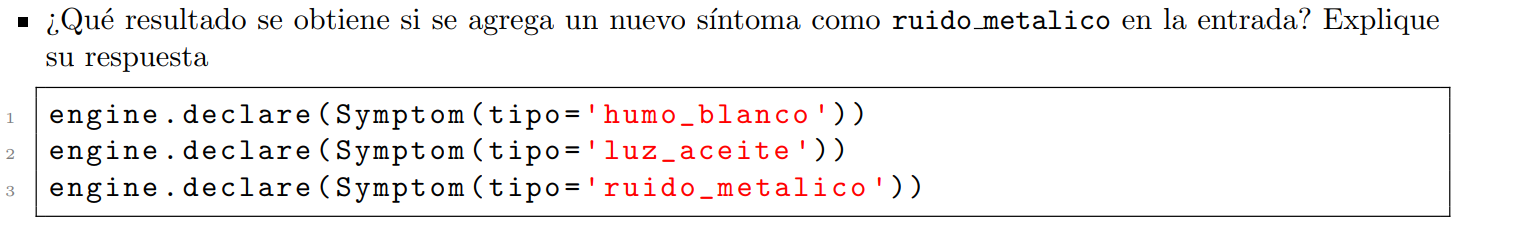

## Resultado de la ejecución
Primera ejecucion - Diagnostico inicial
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Todos los sintomas han sido resueltos. Vehiculo listo.

### Análisis del Orden de Ejecución

Aunque la última línea declarada fue:
```python
engine.declare(Symptom(tipo='ruido_metalico'))
```
la primera regla ejecutada fue la que diagnostica daño grave al motor debido a su `salience=100`, la cual tiene prioridad sobre las otras.

Esta regla declara:
```python
self.declare(RepairAction(tipo='reparar_motor'))
```
y como el último síntoma declarado relevante fue `'luz_aceite'`, se ejecuta la reparación de ese síntoma primero.

Después se elimina `'humo_blanco'`, y luego se ejecuta la regla de `ruido_metalico` que tiene menor prioridad (`salience=50`). Finalmente, cuando todos los síntomas han sido eliminados, se dispara la regla con `salience=5` que indica que el vehículo está listo.

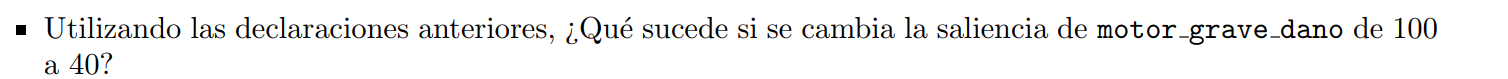

ejecutaria primero `ruido_metalico ` ya que tendría salience = 50
y luego ejecutaria la regla de 
 `Regla: humo blanco y luz de aceite indican posible dano grave al motor`


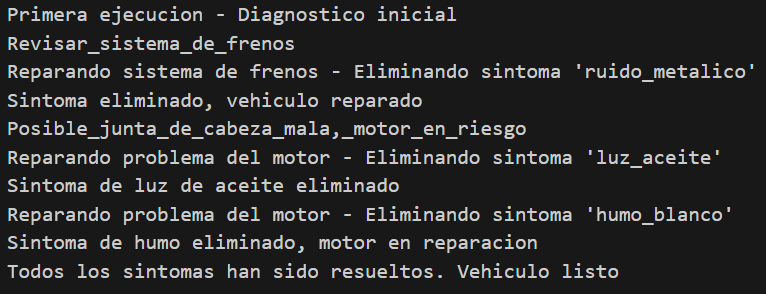

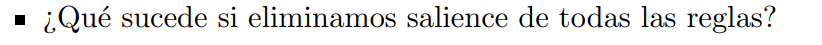

Se ejecutara de manera LIFO (Last In, First Out)  la última declaración de hechos se activa primero 

In [5]:
from experta import Fact, KnowledgeEngine, Rule, AND, NOT # Importa la libreria experta para crear el sistema experto

# Definicion de hechos utilizados en el sistema
class Symptom(Fact):  # Representa un sintoma observado en el vehiculo
    pass

class CarState(Fact):  # Estado general del motor u otra parte del vehiculo
    pass

class Diagnosis(Fact):  # Diagnostico generado por el sistema
    pass

class RepairAction(Fact):  # Representa una accion de reparacion necesaria
    pass

class VehicleStatus(Fact):  # Estado general del proceso de reparacion
    pass

# Clase principal que contiene las reglas del sistema experto
class VehicleDiagnosis(KnowledgeEngine):

    # Regla: humo blanco y luz de aceite indican posible dano grave al motor
    @Rule(AND(Symptom(tipo='humo_blanco'), Symptom(tipo='luz_aceite')))
    def motor_grave_dano(self):
        resultado = 'Posible_junta_de_cabeza_mala,_motor_en_riesgo'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_motor'))

    # Regla: ruido metalico indica posible problema en los frenos
    @Rule(Symptom(tipo='ruido_metalico'), salience=50)
    def frenos_problema(self):
        resultado = 'Revisar_sistema_de_frenos'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='reparar_frenos'))

    # Complete la regla: fuga de liquido + motor caliente = posible perdida de refrigerante
    @Rule(AND(Symptom(tipo='fuga_liquido'), CarState(estado='motor_caliente')))
    def perdida_refrigerante(self):
        resultado = 'Perdida_de_refrigerante,_posible_sobrecalentamiento'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))
        self.declare(RepairAction(tipo='rellenar_refrigerante'))

    # Regla: si no hay sintomas clave, sugerir revision general
    @Rule(NOT(Symptom(tipo='humo_blanco')), NOT(Symptom(tipo='luz_aceite')), NOT(Symptom(tipo='ruido_metalico')))
    def revision_general(self):
        resultado = 'Revision_general_recomendada'
        print(resultado)
        self.declare(Diagnosis(resultado=resultado))

    # Regla de reparacion: eliminar sintoma 'ruido_metalico'
    @Rule(RepairAction(tipo='reparar_frenos'), Symptom(tipo='ruido_metalico'))
    def ejecutar_reparacion_frenos(self):
        print("Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'ruido_metalico':
                self.retract(fact)
                break
        print("Sintoma eliminado, vehiculo reparado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'humo_blanco'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='humo_blanco'))
    def ejecutar_reparacion_motor_humo(self):
        print("Reparando problema del motor - Eliminando sintoma 'humo_blanco'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'humo_blanco':
                self.retract(fact)
                break
        self.declare(CarState(estado='en_reparacion'))
        print("Sintoma de humo eliminado, motor en reparacion")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Regla de reparacion: eliminar sintoma 'luz_aceite'
    @Rule(RepairAction(tipo='reparar_motor'), Symptom(tipo='luz_aceite'))
    def ejecutar_reparacion_motor_aceite(self):
        print("Reparando problema del motor - Eliminando sintoma 'luz_aceite'")
        for fact in self.facts:
            if isinstance(fact, Symptom) and self.facts[fact]['tipo'] == 'luz_aceite':
                self.retract(fact)
                break
        print("Sintoma de luz de aceite eliminado")
        self.declare(VehicleStatus(estado="verificar_reparacion"))

    # Verifica si ya no quedan sintomas: vehiculo esta listo
    @Rule(VehicleStatus(estado="verificar_reparacion"))
    def vehiculo_reparado(self):
        tiene_sintomas = False
        for fact in self.facts:
            if isinstance(fact, Symptom):
                tiene_sintomas = True
                break

        if not tiene_sintomas:
            print("Todos los sintomas han sido resueltos. Vehiculo listo.")

# Ejecucion del sistema experto
if __name__ == "__main__":
    engine = VehicleDiagnosis()
    engine.reset()  # Reinicia el motor

    print("Primera ejecucion - Diagnostico inicial")
    # Complete las declaraciones
    engine.declare(Symptom(tipo='humo_blanco'))
    engine.declare(Symptom(tipo='luz_aceite'))
    engine.declare(Symptom(tipo='ruido_metalico'))

    engine.run()  # Ejecuta las reglas

Primera ejecucion - Diagnostico inicial
Revisar_sistema_de_frenos
Reparando sistema de frenos - Eliminando sintoma 'ruido_metalico'
Sintoma eliminado, vehiculo reparado
Todos los sintomas han sido resueltos. Vehiculo listo.
Posible_junta_de_cabeza_mala,_motor_en_riesgo
Reparando problema del motor - Eliminando sintoma 'luz_aceite'
Sintoma de luz de aceite eliminado
Reparando problema del motor - Eliminando sintoma 'humo_blanco'
Sintoma de humo eliminado, motor en reparacion


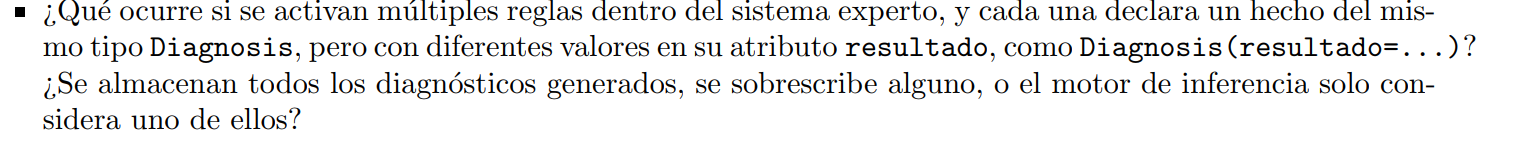

Sí, se almacenan todos los diagnósticos generados.
El motor de inferencia no sobrescribe los hechos declarados previamente, incluso si son del mismo tipo (Diagnosis) pero tienen atributos diferentes.

cada hecho declarado es una instancia única en la memoria del motor, y se pueden tener múltiples hechos del mismo tipo con distintos valores coexistiendo.

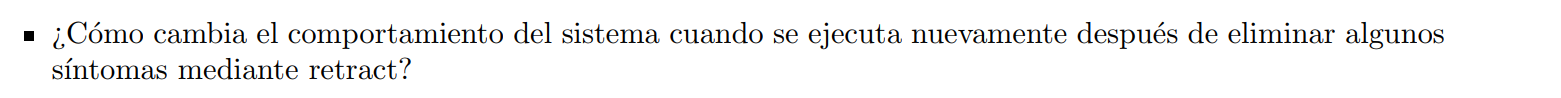

Cuando se eliminan síntomas (por ejemplo, Symptom(tipo='ruido_metalico')) con retract(), se modifica la base de hechos, por lo tanto:

Las reglas que dependían de ese síntoma ya no podrán activarse.

Otras reglas que sí aplican con los hechos restantes, sí pueden ejecutarse.

Si se elimina todos los síntomas relevantes, podrían activarse reglas más generales como la de revisión general.

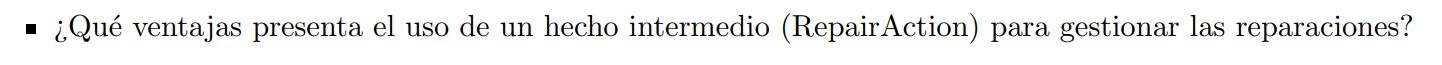

Este RepairAction no lo declara el usuario, sino que lo declara una regla de diagnóstico, y luego lo utilizan otras reglas para ejecutar reparaciones.

permite separar claramente el diagnóstico de la reparación, facilitando un diseño modular y mantenible. Además, mejora el encadenamiento de reglas al permitir que una acción de reparación se active solo cuando hay un diagnóstico previo, evita la redundancia en las condiciones de las reglas, simplifica la lógica del sistema y permite mayor flexibilidad y trazabilidad en el proceso de toma de decisiones.

# Ejercicio 2
Arboles Genealógicos